In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
sns.set_style("white")
df = pd.read_csv('/Users/zhangtong/Downloads/funding-successful-projectsnew-dataset/train.csv')
print(df.head())
print(df.country.unique())
print(df.currency.unique())

       project_id                                               name  \
0  kkst1451568084                                drawing for dollars   
1  kkst1474482071  Sponsor Dereck Blackburn (Lostwars) Artist in ...   
2   kkst183622197                                      Mr. Squiggles   
3   kkst597742710                     Help me write my second novel.   
4  kkst1913131122             Support casting my sculpture in bronze   

                                                desc    goal  \
0  I like drawing pictures. and then i color them...    20.0   
1  I, Dereck Blackburn will be taking upon an inc...   300.0   
2  So I saw darkpony's successfully funded drawin...    30.0   
3  Do your part to help out starving artists and ...   500.0   
4  I'm nearing completion on a sculpture, current...  2000.0   

                                            keywords disable_communication  \
0                                drawing-for-dollars                 False   
1  sponsor-dereck-blackbur

In [21]:
# feature 1 Make North America countries dummies
features = df.copy()
features = pd.get_dummies(df['country'])

features['Nor_America'] = np.where((df['country'].isin(['US', 'CA'])), 1, 0)

print(pd.crosstab(features['Nor_America'], df['country']))

country        AU    CA  DE   DK    GB   IE   NL   NO   NZ   SE     US
Nor_America                                                           
0            1880     0   1  196  8758  111  705  114  355  240      0
1               0  3736   0    0     0    0    0    0    0    0  92033


In [44]:
# feature 2 funds goal more than $35,000

features['big_fund']=np.where(df['goal']<35000, 0, 1)
print(df['goal'].groupby(features['big_fund']).describe())
print(df['goal'].max())
print(df['goal'].mean())
print(df['goal'].min())


big_fund       
0         count    9.638200e+04
          mean     6.696508e+03
          std      7.219934e+03
          min      1.000000e-02
          25%      1.500000e+03
          50%      4.000000e+03
          75%      1.000000e+04
          max      3.499900e+04
1         count    1.174700e+04
          mean     2.831146e+05
          std      2.937166e+06
          min      3.500000e+04
          25%      5.000000e+04
          50%      6.000000e+04
          75%      1.000000e+05
          max      1.000000e+08
Name: goal, dtype: float64
100000000.0
36726.2288325981
0.01


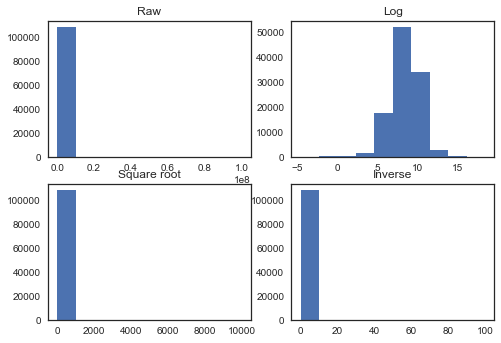

In [31]:
# Feature 3 normalize the data


fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['goal'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['goal'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['goal'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['goal'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_goal'] = np.log(df['goal'])

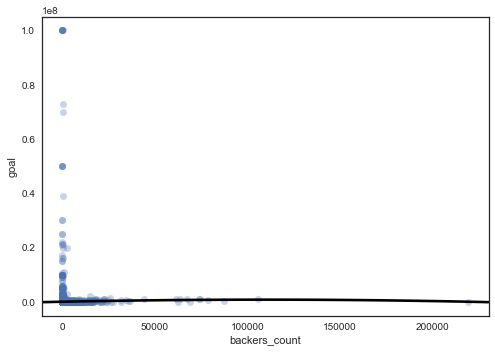

In [36]:
# Feature 4 non-linear plot
sns.regplot(
    df['backers_count'],
    y=df['goal'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

features['backers_squared'] = df['backers_count'] * df['backers_count']

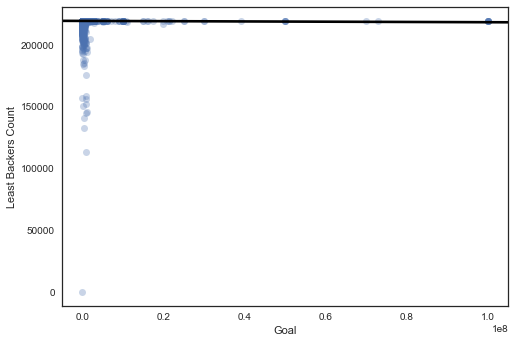

In [37]:

# Feature 5 least backers count

features['least_backers'] = max(df['backers_count']) - df['backers_count']

sns.regplot(
    df['goal'],
    features['least_backers'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('Goal')
plt.ylabel('Least Backers Count')
plt.show()

/Users/zhangtong/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


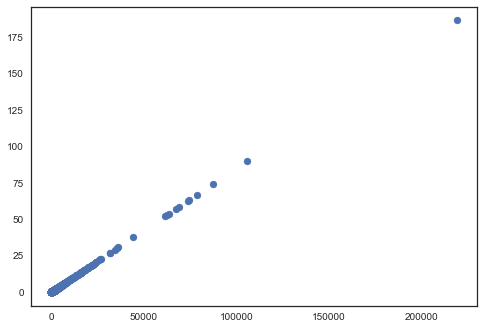

               goal      deadline  state_changed_at    created_at  \
count  1.081290e+05  1.081290e+05      1.081290e+05  1.081290e+05   
mean  -1.374664e-15 -1.058714e-14      2.263003e-15  5.923284e-16   
std    1.000005e+00  1.000005e+00      1.000005e+00  1.000005e+00   
min   -3.778813e-02 -3.253113e+00     -3.253787e+00 -3.129505e+00   
25%   -3.573031e-02 -7.848834e-01     -7.842162e-01 -7.953390e-01   
50%   -3.264357e-02  3.133318e-01      3.144168e-01  2.436085e-01   
75%   -2.441226e-02  8.306563e-01      8.296203e-01  8.329500e-01   
max    1.028536e+02  1.237610e+00      1.240956e+00  1.364335e+00   

        launched_at  backers_count  final_status  
count  1.081290e+05   1.081290e+05  1.081290e+05  
mean  -8.027891e-16   3.038755e-16  2.537642e-14  
std    1.000005e+00   1.000005e+00  1.000005e+00  
min   -3.183128e+00  -1.049651e-01 -6.854072e-01  
25%   -7.773288e-01  -1.032655e-01 -6.854072e-01  
50%    3.160162e-01  -9.051845e-02 -6.854072e-01  
75%    8.268481e-01  

In [39]:
# Feature 6 rescale the numbers
df_num = df.select_dtypes(include=[np.number]).dropna()
names=df_num.columns
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)
plt.scatter(df_num['backers_count'], df_scaled['backers_count'])
plt.show()
print(df_scaled.describe())

In [43]:
# feature 7 funds backers count more than 400

features['backers']=np.where(df['backers_count']<400, 0, 1)
print(df['backers_count'].groupby(features['backers']).describe())
print(df['backers_count'].max())
print(df['backers_count'].mean())
print(df['backers_count'].min())


backers       
0        count    102969.000000
         mean         42.866348
         std          67.004925
         min           0.000000
         25%           2.000000
         50%          15.000000
         75%          54.000000
         max         399.000000
1        count      5160.000000
         mean       1732.912403
         std        5119.823167
         min         400.000000
         25%         541.000000
         50%         816.000000
         75%        1494.250000
         max      219382.000000
Name: backers_count, dtype: float64
219382
123.51666065532835
0


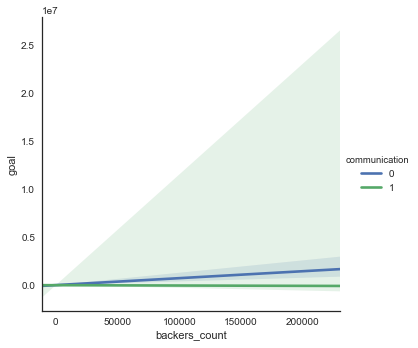

In [47]:
# feature 8 interaction between goal and backers count
features['communication'] = np.where(df['disable_communication'].astype(str) == 'True', 1, 0)
features['backers_count']=df['backers_count']
features['goal'] = df['goal']
sns.lmplot(
    x='backers_count',
    y='goal',
    hue='communication',
    data=features,
    scatter=False
)
plt.show()

In [53]:
# feature 9 feature for success project
features['Success'] = df['final_status']

print(pd.crosstab(features['Success'], df['final_status']))

final_status      0      1
Success                   
0             73568      0
1                 0  34561


In [54]:
# feature 10 Make dummies for USD, EUR
features = df.copy()
features = pd.get_dummies(df['currency'])

features['USD_EUR'] = np.where((df['currency'].isin(['USD', 'EUR'])), 1, 0)

print(pd.crosstab(features['USD_EUR'], df['currency']))

currency   AUD   CAD  DKK  EUR   GBP  NOK  NZD  SEK    USD
USD_EUR                                                   
0         1880  3736  196    0  8758  114  355  240      0
1            0     0    0  817     0    0    0    0  92033
